In [1]:
#Importing packages
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.options.display.max_columns = 70
pd.options.display.max_rows = 99

In [2]:
df = pd.read_excel('Jan_17_Stats.xlsx', sheet_name='HoopsIQ - Player Stats')
df2 = pd.read_excel('Jan_17_Stats.xlsx', sheet_name='HoopsIQ - Team stats')

In [3]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%
0,1,BAXTER,HUGH,14,99.233333,165,25,20,9,23,39.130435,7,13,53.846154,2,10,20.000000,5,7,71.428571,3,11,14,8,5,2,0,22,43.478261,0.869565,46.296296,56.521739,43.478261,30.434783,66.509909,120.000000,106.586826,13.413174,32,78.125000,17.204301,3.658537,13.253012,8.484848,0,12.903226,1.600000,15.625000
1,24,DIENER,JOHN,7,36.983333,64,6,-2,2,3,66.666667,0,0,-1.000000,2,3,66.666667,0,0,-1.000000,0,6,6,0,1,0,0,5,100.000000,2.000000,100.000000,0.000000,100.000000,0.000000,69.220370,93.750000,93.939394,-0.189394,4,150.000000,5.970149,0.000000,13.953488,8.571429,-12,0.000000,0.000000,25.000000
2,11,EVERMAN,SCOTT,17,408.133333,687,175,158,68,126,53.968254,45,58,77.586207,23,68,33.823529,16,22,72.727273,13,26,39,21,12,7,5,30,63.095238,1.261905,64.338235,46.031746,53.968254,17.460317,67.330938,124.017467,99.856115,24.161352,148,118.243243,19.576720,4.482759,7.242340,6.009245,-14,8.713693,1.750000,8.108108
3,3,HADLEY,GABE,17,281.833333,470,102,143,35,83,42.168675,11,16,68.750000,24,67,35.820896,8,8,100.000000,5,22,27,18,16,6,1,21,56.626506,1.132530,59.302326,19.277108,80.722892,9.638554,66.706091,125.744681,96.969697,28.774984,102,100.000000,19.465649,2.283105,9.361702,5.947137,-1,10.227273,1.125000,15.686275
4,44,HANSEN,CHRIS,8,219.133333,373,154,179,56,97,57.731959,37,55,67.272727,19,42,45.238095,23,24,95.833333,20,42,62,10,8,8,6,15,67.525773,1.350515,71.296296,56.701031,43.298969,24.742268,68.086401,143.431635,95.956873,47.474762,116,132.758621,27.751196,12.820513,20.792079,17.318436,-15,7.194245,1.250000,6.896552
5,32,HOWELL,MIKEY,17,535.816667,897,128,285,44,78,56.410256,28,46,60.869565,16,32,50.000000,24,34,70.588235,8,53,61,125,43,27,4,35,66.666667,1.333333,69.565217,58.974359,41.025641,43.589744,66.963203,130.546265,99.438833,31.107433,135,94.814815,13.608871,2.094241,11.910112,7.376058,-20,33.068783,2.906977,31.851852
6,15,JOHNSON,JEREMY,3,20.633333,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,0,1,2,16.666667,0.333333,16.666667,66.666667,33.333333,0.000000,67.851373,102.857143,78.947368,23.909774,8,25.000000,19.512195,11.764706,0.000000,5.405405,1,27.272727,1.500000,25.000000
7,14,OSHITA,CHRISTIAN,17,537.416667,900,311,249,107,202,52.970297,52,86,60.465116,55,116,47.413793,42,53,79.245283,29,80,109,31,23,12,2,45,66.584158,1.331683,68.502203,42.574257,57.425743,26.237624,66.987130,125.000000,98.096305,26.903695,250,124.400000,24.950100,7.268170,17.897092,12.884161,-13,10.299003,1.347826,9.200000
8,10,PETERSON,CONNOR,7,37.900000,62,4,-6,1,5,20.000000,1,5,20.000000,0,0,-1.000000,2,3,66.666667,0,2,2,1,4,2,0,5,20.000000,0.400000,28.571429,100.000000,0.000000,60.000000,65.435356,95.161290,97.014925,-1.853635,11,36.363636,17.187500,0.000000,5.555556,2.985075,-7,5.000000,0.250000,36.363636
9,12,PRATT,JUSTIN,7,29.416667,55,14,-20,6,9,66.666667,5,7,71.428571,1,2,50.000000,1,3,33.333333,0,2,2,0,0,1,0,3,72.222222,1.444444,70.000000,77.777778,22.222222,33.333333,74.787535,90.909091,120.689655,-29.780564,10,140.000000,17.543860,0.000000,7.142857,3.636364,-8,0.000000,-1.000000,0.000000


In [4]:
df['FGAPS'] = df.FGA / (df.Min*60)
df['PPP'] = df.Pts/df.Pos
df['PPG'] = df.Pts/df.GP
df['PPG/FGA'] = df.PPG/df.FGA

In [5]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,FGAPS,PPP,PPG,PPG/FGA
0,1,BAXTER,HUGH,14,99.233333,165,25,20,9,23,39.130435,7,13,53.846154,2,10,20.000000,5,7,71.428571,3,11,14,8,5,2,0,22,43.478261,0.869565,46.296296,56.521739,43.478261,30.434783,66.509909,120.000000,106.586826,13.413174,32,78.125000,17.204301,3.658537,13.253012,8.484848,0,12.903226,1.600000,15.625000,0.003863,0.151515,1.785714,0.077640
1,24,DIENER,JOHN,7,36.983333,64,6,-2,2,3,66.666667,0,0,-1.000000,2,3,66.666667,0,0,-1.000000,0,6,6,0,1,0,0,5,100.000000,2.000000,100.000000,0.000000,100.000000,0.000000,69.220370,93.750000,93.939394,-0.189394,4,150.000000,5.970149,0.000000,13.953488,8.571429,-12,0.000000,0.000000,25.000000,0.001352,0.093750,0.857143,0.285714
2,11,EVERMAN,SCOTT,17,408.133333,687,175,158,68,126,53.968254,45,58,77.586207,23,68,33.823529,16,22,72.727273,13,26,39,21,12,7,5,30,63.095238,1.261905,64.338235,46.031746,53.968254,17.460317,67.330938,124.017467,99.856115,24.161352,148,118.243243,19.576720,4.482759,7.242340,6.009245,-14,8.713693,1.750000,8.108108,0.005145,0.254731,10.294118,0.081699
3,3,HADLEY,GABE,17,281.833333,470,102,143,35,83,42.168675,11,16,68.750000,24,67,35.820896,8,8,100.000000,5,22,27,18,16,6,1,21,56.626506,1.132530,59.302326,19.277108,80.722892,9.638554,66.706091,125.744681,96.969697,28.774984,102,100.000000,19.465649,2.283105,9.361702,5.947137,-1,10.227273,1.125000,15.686275,0.004908,0.217021,6.000000,0.072289
4,44,HANSEN,CHRIS,8,219.133333,373,154,179,56,97,57.731959,37,55,67.272727,19,42,45.238095,23,24,95.833333,20,42,62,10,8,8,6,15,67.525773,1.350515,71.296296,56.701031,43.298969,24.742268,68.086401,143.431635,95.956873,47.474762,116,132.758621,27.751196,12.820513,20.792079,17.318436,-15,7.194245,1.250000,6.896552,0.007378,0.412869,19.250000,0.198454
5,32,HOWELL,MIKEY,17,535.816667,897,128,285,44,78,56.410256,28,46,60.869565,16,32,50.000000,24,34,70.588235,8,53,61,125,43,27,4,35,66.666667,1.333333,69.565217,58.974359,41.025641,43.589744,66.963203,130.546265,99.438833,31.107433,135,94.814815,13.608871,2.094241,11.910112,7.376058,-20,33.068783,2.906977,31.851852,0.002426,0.142698,7.529412,0.096531
6,15,JOHNSON,JEREMY,3,20.633333,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,0,1,2,16.666667,0.333333,16.666667,66.666667,33.333333,0.000000,67.851373,102.857143,78.947368,23.909774,8,25.000000,19.512195,11.764706,0.000000,5.405405,1,27.272727,1.500000,25.000000,0.004847,0.057143,0.666667,0.111111
7,14,OSHITA,CHRISTIAN,17,537.416667,900,311,249,107,202,52.970297,52,86,60.465116,55,116,47.413793,42,53,79.245283,29,80,109,31,23,12,2,45,66.584158,1.331683,68.502203,42.574257,57.425743,26.237624,66.987130,125.000000,98.096305,26.903695,250,124.400000,24.950100,7.268170,17.897092,12.884161,-13,10.299003,1.347826,9.200000,0.006265,0.345556,18.294118,0.090565
8,10,PETERSON,CONNOR,7,37.900000,62,4,-6,1,5,20.000000,1,5,20.000000,0,0,-1.000000,2,3,66.666667,0,2,2,1,4,2,0,5,20.000000,0.400000,28.571429,100.000000,0.000000,60.000000,65.435356,95.161290,97.014925,-1.853635,11,36.363636,17.187500,0.000000,5.555556,2.985075,-7,5.000000,0.250000,36.363636,0.002199,0.064516,0.571429,0.114286
9,12,PRATT,JUSTIN,7,29.416667,55,14,-20,6,9,66.666667,5,7,71.428571,1,2,50.000000,1,3,33.333333,0,2,2,0,0,1,0,3,72.222222,1.444444,70.000000,77.777778,22.222222,33.333333,74.787535,90.909091,120.689655,-29.780564,10,140.000000,17.543860,0.000000,7.142857,3.636364,-8,0.000000,-1.000000,0.000000,0.005099,0.254545,2.000000,0.222222


### What I an doing in this analysis

> I am exploring the distribution of a the random variable I am calling Field Goal Attempts Per Second, to see if the values of this variable are normal distributed. The reason I am doing this is because I really need to understand the underlying behavior of the data I am going to use in the more advanced metrics and models I will be attempting to recreate/ create new versions. 

> One of Dean Oliver's stats he invented was individual and Team defensive stops, the calculation of this statistic invlolves conditional probabilities using box score metrics to determine an estimation variable knows as Stops to estimate the amount of defesnive stops teams/players are responsible for.



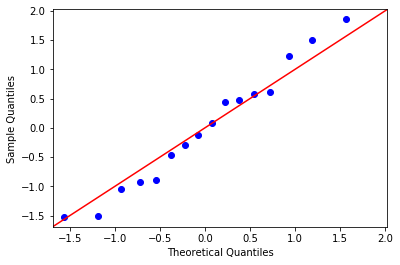

In [6]:
# I need to import some more statistical packages to use in determing the distribution 
import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = df['FGAPS']
sm.qqplot(my_data, line='45',fit=True)
pylab.show()

One of the major contingencies of using the conditional probability formulas we know of, the data we are using must assume to be mostly normally distributed (mean=0,std=1)

I used python's scipy package to help plot a Quantile-Quantile plot of the data which essential shows us the normal distribution by plot the data to a line. The close to the line the data is the more normal unimodal distribution exist. 

We can see that our FGAPS is mostly normally distributed which is good enough for me to continue with the stops calculations. 

In [7]:
df['RFG%']=df['FG%']/100
df['RFT%']=df['FT%']/100
df2['RFG%']=df2['FG%']/100
df2['RFT%']=df2['FT%']/100


In [8]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,FGAPS,PPP,PPG,PPG/FGA,RFG%,RFT%
0,1,BAXTER,HUGH,14,99.233333,165,25,20,9,23,39.130435,7,13,53.846154,2,10,20.000000,5,7,71.428571,3,11,14,8,5,2,0,22,43.478261,0.869565,46.296296,56.521739,43.478261,30.434783,66.509909,120.000000,106.586826,13.413174,32,78.125000,17.204301,3.658537,13.253012,8.484848,0,12.903226,1.600000,15.625000,0.003863,0.151515,1.785714,0.077640,0.391304,0.714286
1,24,DIENER,JOHN,7,36.983333,64,6,-2,2,3,66.666667,0,0,-1.000000,2,3,66.666667,0,0,-1.000000,0,6,6,0,1,0,0,5,100.000000,2.000000,100.000000,0.000000,100.000000,0.000000,69.220370,93.750000,93.939394,-0.189394,4,150.000000,5.970149,0.000000,13.953488,8.571429,-12,0.000000,0.000000,25.000000,0.001352,0.093750,0.857143,0.285714,0.666667,-0.010000
2,11,EVERMAN,SCOTT,17,408.133333,687,175,158,68,126,53.968254,45,58,77.586207,23,68,33.823529,16,22,72.727273,13,26,39,21,12,7,5,30,63.095238,1.261905,64.338235,46.031746,53.968254,17.460317,67.330938,124.017467,99.856115,24.161352,148,118.243243,19.576720,4.482759,7.242340,6.009245,-14,8.713693,1.750000,8.108108,0.005145,0.254731,10.294118,0.081699,0.539683,0.727273
3,3,HADLEY,GABE,17,281.833333,470,102,143,35,83,42.168675,11,16,68.750000,24,67,35.820896,8,8,100.000000,5,22,27,18,16,6,1,21,56.626506,1.132530,59.302326,19.277108,80.722892,9.638554,66.706091,125.744681,96.969697,28.774984,102,100.000000,19.465649,2.283105,9.361702,5.947137,-1,10.227273,1.125000,15.686275,0.004908,0.217021,6.000000,0.072289,0.421687,1.000000
4,44,HANSEN,CHRIS,8,219.133333,373,154,179,56,97,57.731959,37,55,67.272727,19,42,45.238095,23,24,95.833333,20,42,62,10,8,8,6,15,67.525773,1.350515,71.296296,56.701031,43.298969,24.742268,68.086401,143.431635,95.956873,47.474762,116,132.758621,27.751196,12.820513,20.792079,17.318436,-15,7.194245,1.250000,6.896552,0.007378,0.412869,19.250000,0.198454,0.577320,0.958333
5,32,HOWELL,MIKEY,17,535.816667,897,128,285,44,78,56.410256,28,46,60.869565,16,32,50.000000,24,34,70.588235,8,53,61,125,43,27,4,35,66.666667,1.333333,69.565217,58.974359,41.025641,43.589744,66.963203,130.546265,99.438833,31.107433,135,94.814815,13.608871,2.094241,11.910112,7.376058,-20,33.068783,2.906977,31.851852,0.002426,0.142698,7.529412,0.096531,0.564103,0.705882
6,15,JOHNSON,JEREMY,3,20.633333,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,0,1,2,16.666667,0.333333,16.666667,66.666667,33.333333,0.000000,67.851373,102.857143,78.947368,23.909774,8,25.000000,19.512195,11.764706,0.000000,5.405405,1,27.272727,1.500000,25.000000,0.004847,0.057143,0.666667,0.111111,0.166667,-0.010000
7,14,OSHITA,CHRISTIAN,17,537.416667,900,311,249,107,202,52.970297,52,86,60.465116,55,116,47.413793,42,53,79.245283,29,80,109,31,23,12,2,45,66.584158,1.331683,68.502203,42.574257,57.425743,26.237624,66.987130,125.000000,98.096305,26.903695,250,124.400000,24.950100,7.268170,17.897092,12.884161,-13,10.299003,1.347826,9.200000,0.006265,0.345556,18.294118,0.090565,0.529703,0.792453
8,10,PETERSON,CONNOR,7,37.900000,62,4,-6,1,5,20.000000,1,5,20.000000,0,0,-1.000000,2,3,66.666667,0,2,2,1,4,2,0,5,20.000000,0.400000,28.571429,100.000000,0.000000,60.000000,65.435356,95.161290,97.014925,-1.853635,11,36.363636,17.187500,0.000000,5.555556,2.985075,-7,5.000000,0.250000,36.363636,0.002199,0.064516,0.571429,0.114286,0.200000,0.666667
9,12,PRATT,JUSTIN,7,29.416667,55,14,-20,6,9,66.666667,5,7,71.428571,1,2,50.000000,1,3,33.333333,0,2,2,0,0,1,0,3,72.222222,1.444444,70.000000,77.777778,22.222222,33.333333,74.787535,90.909091,120.689655,-29.780564,10,140.000000,17.543860,0.000000,7.142857,3.636364,-8,0.000000,-1.000000,0.000000,0.005099,0.254545,2.000000,0.222222,0.666667,0.333333


In [9]:
dfopp=df2.drop([0])
dftm=df2.drop([1])


In [10]:
dfopp

,Team,GP,Min,Pos,Pts,+/-,PE,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,ORB%,DRB%,REB%,ORbD,ATR,TO%,RFG%,RFT%
1,Opponents,17,680,1144,1134,-281,99.125874,422,958,44.050104,308,640,48.125,114,318,35.849057,176,263,66.920152,149,376,525,203,222,86,22,273,50.0,1.0,52.64624,66.805846,33.194154,27.453027,67.294118,99.125874,124.340949,-25.215075,1299,87.297921,25.426621,74.455446,48.12099,29,0.914414,17.090069,0.440501,0.669202


In [11]:
dftm

,Team,GP,Min,Pos,Pts,+/-,PE,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,ORB%,DRB%,REB%,ORbD,ATR,TO%,RFG%,RFT%
0,UC San Diego,17,680,1138,1415,281,124.340949,507,982,51.629328,300,464,64.655172,207,518,39.96139,194,243,79.835391,120,426,546,328,170,122,34,265,62.169043,1.243381,64.848763,47.250509,52.749491,24.745418,66.941176,124.340949,99.125874,25.215075,1261,112.21253,23.762376,72.696246,50.04583,-29,1.929412,13.481364,0.516293,0.798354


In [12]:
blk_nto=float(149/(376+146))
blk_nto

0.28544061302681994

In [13]:
oppFGP=dfopp['RFG%'].values[0]
tmFGP=dftm['RFG%'].values[0]

In [14]:
# Let's use Dean Oliver's formulas for individual stops to get our first estimate

df['ind_stops'] = df['Stl']+df['Blk']*((oppFGP*(1-blk_nto))/((oppFGP*(1-blk_nto))+((1-oppFGP)*blk_nto)))*(1-1.07*blk_nto)+df['DRb']*(1-((oppFGP*(1-blk_nto))/((oppFGP*(1-blk_nto))+((1-oppFGP)*blk_nto))))                

In [15]:
df

,#,Last,First,GP,Min,Pos,Pts,+/-,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,TPo%,ORB%,DRB%,REB%,ORbD,AST%,ATR,TO%,FGAPS,PPP,PPG,PPG/FGA,RFG%,RFT%,ind_stops
0,1,BAXTER,HUGH,14,99.233333,165,25,20,9,23,39.130435,7,13,53.846154,2,10,20.000000,5,7,71.428571,3,11,14,8,5,2,0,22,43.478261,0.869565,46.296296,56.521739,43.478261,30.434783,66.509909,120.000000,106.586826,13.413174,32,78.125000,17.204301,3.658537,13.253012,8.484848,0,12.903226,1.600000,15.625000,0.003863,0.151515,1.785714,0.077640,0.391304,0.714286,5.702550
1,24,DIENER,JOHN,7,36.983333,64,6,-2,2,3,66.666667,0,0,-1.000000,2,3,66.666667,0,0,-1.000000,0,6,6,0,1,0,0,5,100.000000,2.000000,100.000000,0.000000,100.000000,0.000000,69.220370,93.750000,93.939394,-0.189394,4,150.000000,5.970149,0.000000,13.953488,8.571429,-12,0.000000,0.000000,25.000000,0.001352,0.093750,0.857143,0.285714,0.666667,-0.010000,2.019573
2,11,EVERMAN,SCOTT,17,408.133333,687,175,158,68,126,53.968254,45,58,77.586207,23,68,33.823529,16,22,72.727273,13,26,39,21,12,7,5,30,63.095238,1.261905,64.338235,46.031746,53.968254,17.460317,67.330938,124.017467,99.856115,24.161352,148,118.243243,19.576720,4.482759,7.242340,6.009245,-14,8.713693,1.750000,8.108108,0.005145,0.254731,10.294118,0.081699,0.539683,0.727273,18.055414
3,3,HADLEY,GABE,17,281.833333,470,102,143,35,83,42.168675,11,16,68.750000,24,67,35.820896,8,8,100.000000,5,22,27,18,16,6,1,21,56.626506,1.132530,59.302326,19.277108,80.722892,9.638554,66.706091,125.744681,96.969697,28.774984,102,100.000000,19.465649,2.283105,9.361702,5.947137,-1,10.227273,1.125000,15.686275,0.004908,0.217021,6.000000,0.072289,0.421687,1.000000,13.865886
4,44,HANSEN,CHRIS,8,219.133333,373,154,179,56,97,57.731959,37,55,67.272727,19,42,45.238095,23,24,95.833333,20,42,62,10,8,8,6,15,67.525773,1.350515,71.296296,56.701031,43.298969,24.742268,68.086401,143.431635,95.956873,47.474762,116,132.758621,27.751196,12.820513,20.792079,17.318436,-15,7.194245,1.250000,6.896552,0.007378,0.412869,19.250000,0.198454,0.577320,0.958333,24.901728
5,32,HOWELL,MIKEY,17,535.816667,897,128,285,44,78,56.410256,28,46,60.869565,16,32,50.000000,24,34,70.588235,8,53,61,125,43,27,4,35,66.666667,1.333333,69.565217,58.974359,41.025641,43.589744,66.963203,130.546265,99.438833,31.107433,135,94.814815,13.608871,2.094241,11.910112,7.376058,-20,33.068783,2.906977,31.851852,0.002426,0.142698,7.529412,0.096531,0.564103,0.705882,46.682705
6,15,JOHNSON,JEREMY,3,20.633333,35,2,6,1,6,16.666667,1,4,25.000000,0,2,0.000000,0,0,-1.000000,2,0,2,3,2,0,1,2,16.666667,0.333333,16.666667,66.666667,33.333333,0.000000,67.851373,102.857143,78.947368,23.909774,8,25.000000,19.512195,11.764706,0.000000,5.405405,1,27.272727,1.500000,25.000000,0.004847,0.057143,0.666667,0.111111,0.166667,-0.010000,0.460787
7,14,OSHITA,CHRISTIAN,17,537.416667,900,311,249,107,202,52.970297,52,86,60.465116,55,116,47.413793,42,53,79.245283,29,80,109,31,23,12,2,45,66.584158,1.331683,68.502203,42.574257,57.425743,26.237624,66.987130,125.000000,98.096305,26.903695,250,124.400000,24.950100,7.268170,17.897092,12.884161,-13,10.299003,1.347826,9.200000,0.006265,0.345556,18.294118,0.090565,0.529703,0.792453,39.849208
8,10,PETERSON,CONNOR,7,37.900000,62,4,-6,1,5,20.000000,1,5,20.000000,0,0,-1.000000,2,3,66.666667,0,2,2,1,4,2,0,5,20.000000,0.400000,28.571429,100.000000,0.000000,60.000000,65.435356,95.161290,97.014925,-1.853635,11,36.363636,17.187500,0.000000,5.555556,2.985075,-7,5.000000,0.250000,36.363636,0.002199,0.064516,0.571429,0.114286,0.200000,0.666667,2.673191
9,12,PRATT,JUSTIN,7,29.416667,55,14,-20,6,9,66.666667,5,7,71.428571,1,2,50.000000,1,3,33.333333,0,2,2,0,0,1,0,3,72.222222,1.444444,70.000000,77.777778,22.222222,33.333333,74.787535,90.909091,120.689655,-29.780564,10,140.000000,17.543860,0.000000,7.142857,3.636364,-8,0.000000,-1.000000,0.000000,0.005099,0.254545,2.000000,0.222222,0.666667,0.333333,1.673191


- After calculate individual stops it is interesting to see that marek has both very good DRTG and the most individual stops on the team

- I witness this all the time in game film and during the games when I see them live. Very valuable at guarding positions 2-4 and he can sometimes handle some big men. 

In [16]:
df['ind_stops']/df['GP']

0     0.407325
1     0.288510
2     1.062083
3     0.815640
4     3.112716
5     2.746041
6     0.153596
7     2.344071
8     0.381884
9     0.239027
10    0.334964
11    0.878380
12    1.996716
13    3.712969
14    0.084149
15    0.336595
dtype: float64

In [17]:
 df['PF']/dftm['PF'].values[0]

0     0.083019
1     0.018868
2     0.113208
3     0.079245
4     0.056604
5     0.132075
6     0.007547
7     0.169811
8     0.018868
9     0.011321
10    0.022642
11    0.041509
12    0.098113
13    0.116981
14    0.011321
15    0.018868
Name: PF, dtype: float64

In [18]:
df2['Team Stops']= ((dfopp['FGA'].values[0]-dfopp['FGM'].values[0]-dftm['Blk'].values[0])/(dftm['Min']))*((oppFGP*(1-blk_nto))/(oppFGP*(1-blk_nto)+(1-oppFGP)*blk_nto))*((1-1.07*blk_nto))+((dfopp['TO'].values[0]-dftm['Stl'].values[0])/(dftm['Min'].values[0]))*df['Min']+0.43*((df['PF']/dftm['PF'].values[0]))*(dfopp['FTA'].values[0])*(1-(dfopp['FTM'].values[0]/dfopp['FTA'].values[0])**2)

In [19]:
df2

,Team,GP,Min,Pos,Pts,+/-,PE,FGM,FGA,FG%,2FM,2FA,2F%,3FM,3FA,3F%,FTM,FTA,FT%,ORb,DRb,Reb,Ast,TO,Stl,Blk,PF,eFG%,PPS,TS%,2FR,3FR,FTR,Pace,ORTG,DRTG,NRTG,TPos,TPE,ORB%,DRB%,REB%,ORbD,ATR,TO%,RFG%,RFT%,Team Stops
0,UC San Diego,17,680,1138,1415,281,124.340949,507,982,51.629328,300,464,64.655172,207,518,39.961390,194,243,79.835391,120,426,546,328,170,122,34,265,62.169043,1.243381,64.848763,47.250509,52.749491,24.745418,66.941176,124.340949,99.125874,25.215075,1261,112.212530,23.762376,72.696246,50.04583,-29,1.929412,13.481364,0.516293,0.798354,20.117405
1,Opponents,17,680,1144,1134,-281,99.125874,422,958,44.050104,308,640,48.125000,114,318,35.849057,176,263,66.920152,149,376,525,203,222,86,22,273,50.000000,1.000000,52.646240,66.805846,33.194154,27.453027,67.294118,99.125874,124.340949,-25.215075,1299,87.297921,25.426621,74.455446,48.12099,29,0.914414,17.090069,0.440501,0.669202,NaN


In [20]:
df_19_20 = pd.read_excel('PPP_Analysis.xlsx', sheet_name='19_20_Season')
df_19_20_opp = pd.read_excel('PPP_Analysis.xlsx', sheet_name='19_20PerOpp')
pearsoncorr_seas=df_19_20.corr(method='pearson')

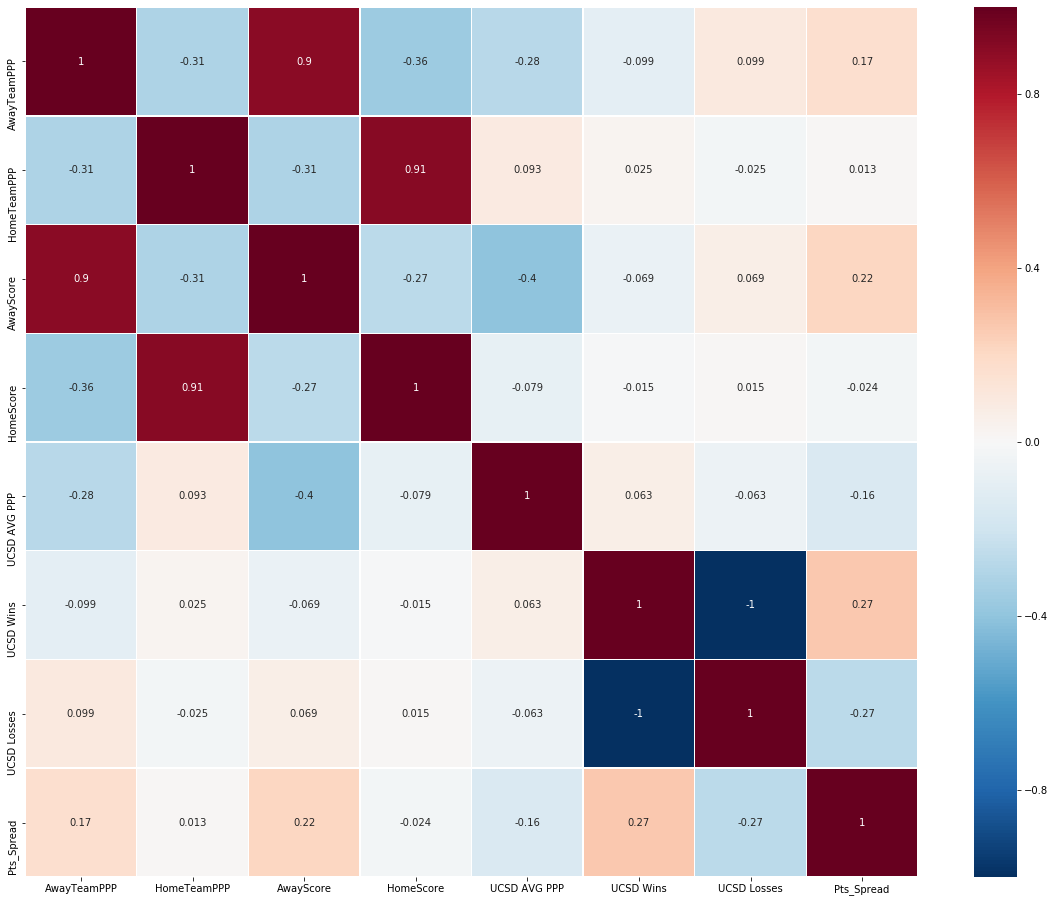

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(pearsoncorr_seas, 
            xticklabels=pearsoncorr_seas.columns,
            yticklabels=pearsoncorr_seas.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

### I am now going to look deepr into Dean Oliver's Four Factors:

- I plan on looking and analyizing this years difference in our Four Factors (there really is 8 because of defensive side), and after that I will try to collect the data needed from the previous 8 years of UCSD basketball to build a multiple linear regression model with the 8 factors used as my features.

> But first things first, we should descirbe what Dean Oliver's Four Factors are...
> Copied from Basketball-refernce.com How do basketball teams win games? While searching for an answer to that question, Dean Oliver identified what he called the "Four Factors of Basketball Success":
>Shooting (40%)
>Turnovers (25%)
>Rebounding (20%)
>Free Throws (15%)

>The number in parentheses is the approximate weight Mr. Oliver assigned each factor. Shooting is the most important factor, followed by turnovers, rebounding, and free throws. [Editor's note: I agree with the order, but disagree with the weightings.] These factors can be applied to both a team's offense and defense, which in a sense gives us eight factors. Let's take a closer look at how these factors are measured, using the 2004-05 Phoenix Suns as an example.
> then we can discuss our statiscal modeling

In [47]:
df4fact=df_19_20 = pd.read_excel('PPP_Analysis.xlsx', sheet_name='19_20_4Factors')
four_factors = df4fact.drop(index=0)
y = df4fact['W']
# df4fact=df4fact[['eFG%','TO%','OREB%','FTR','OppeFG%','OppTO%','DREB%','OppFTR']].multiply(0.01)


In [48]:
# X = df4fact[['eFG%','TO%','OREB%','FTR','OppeFG%','OppTO%','DREB%','OppFTR']].values
# X = X.flatten()
four_factors

,Year,Team,W,Pos,eFG%,TO%,OREB%,FTR,OppeFG%,OppTO%,DREB%,OppFTR
1,2019-2020(NC),UCSD,8,595,60.794297,14.241486,18.918919,28.105906,53.578732,19.161677,74.021352,23.108384
2,2019-2020(WC),UCSD,8,543,56.122449,12.682927,28.861789,21.384929,46.055437,14.896989,71.475410,31.982942


In [49]:
# X = df4fact[['eFG%','TO%','OREB%','FTR','OppeFG%','OppTO%','DREB%','OppFTR']]

# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()
# est.summary()

In [50]:
df4fact

,Year,Team,W,Pos,eFG%,TO%,OREB%,FTR,OppeFG%,OppTO%,DREB%,OppFTR
0,2019-2020,UCSD,16,1138,62.169043,13.481364,23.762376,24.745418,50.000000,17.090069,72.696246,27.453027
1,2019-2020(NC),UCSD,8,595,60.794297,14.241486,18.918919,28.105906,53.578732,19.161677,74.021352,23.108384
2,2019-2020(WC),UCSD,8,543,56.122449,12.682927,28.861789,21.384929,46.055437,14.896989,71.475410,31.982942


In [52]:
four_factors

,Year,Team,W,Pos,eFG%,TO%,OREB%,FTR,OppeFG%,OppTO%,DREB%,OppFTR
1,2019-2020(NC),UCSD,8,595,60.794297,14.241486,18.918919,28.105906,53.578732,19.161677,74.021352,23.108384
2,2019-2020(WC),UCSD,8,543,56.122449,12.682927,28.861789,21.384929,46.055437,14.896989,71.475410,31.982942


In [51]:
difference = four_factors.drop(columns=['Year','Team']).diff(axis=0, periods=1);
print("Difference between rows(Period=1):");

print(difference);

Difference between rows(Period=1):
     W   Pos      eFG%       TO%    OREB%       FTR   OppeFG%    OppTO%  \
1  NaN   NaN       NaN       NaN      NaN       NaN       NaN       NaN   
2  0.0 -52.0 -4.671848 -1.558559  9.94287 -6.720978 -7.523295 -4.264688   

      DREB%    OppFTR  
1       NaN       NaN  
2 -2.545942  8.874558  


### Something interesting from the above code......

- From taking the difference between rows of the four factors dataframe created we are left with some interesting findings. 

>
>- eFG%- The games without Chris Hansen in the lineup we are shooting a higher eFG%, this is a good sign especially because we knew without Chris in the lineup we need to make shots but more importantly efficient shot selection was key. It seems just from this difference that we have in fact been able to take more efficient shots by selection more or less. 
>
>
>- TO%- The games with Chris Hansen in the lineup we can see that our overall TO% is lower by 1.5% this is not horrible but something to note because we are turning the ball over more without Chris. 
>
>
>- OREB%- We are getting about 10% less total possible offensive rebounds than when we had Chris in the lineup. I expected this too happen. 
>
>
>- FTR- We are actually getting to the line 6% more than when we had Chris, that is good for us because I thought this would be an issue. 
>
>
>- OppeFG%- Unfourtantely we are allowing our opponents to shoot more highpercentage shots because their eFG% has gone up without Chris, who was helpful at permieter and interior defense. This is the most troublesome sign so far from our performances.
>
>
>- OppTO%- Another good outcome we have from the games without Chris is that we are causing more turnovers! The games with Chris our opponentTO% was 4% lower than now. 
>
>
>- DREB%- Nothing large here but we are rebounding more on defense than we did with Chris in the lineup.
>
>
>- OppFTR- Our opponents are getting more Free throws per game without Chris, this is evident of us not being able to play defense without fouling and it is important to see the difference. 



In [40]:
difference.to_csv('difference.csv')


In [ ]:
# mod = sm.OLS(X, y_list)

# res = mod.fit()

# print(res.summary())